In [12]:
import numpy as np

da_l = [55, 57, 64, 63, 58, 49, 54, 61]
da_h = [30, 31, 36, 30, 33, 25, 37, 34]
jin_l = [56, 47, 56, 46, 49, 53, 52, 48]
jin_h = [52, 52, 50, 53, 50, 53, 49, 54]

In [13]:
d = np.column_stack((da_l, da_h))
j = np.column_stack((jin_l, jin_h))

d
#2차원 배열로 바꿈

array([[55, 30],
       [57, 31],
       [64, 36],
       [63, 30],
       [58, 33],
       [49, 25],
       [54, 37],
       [61, 34]])

In [14]:
x = np.concatenate((d,j))
y = [0]*len(d) + [1]*len(j)
x, y

(array([[55, 30],
        [57, 31],
        [64, 36],
        [63, 30],
        [58, 33],
        [49, 25],
        [54, 37],
        [61, 34],
        [56, 52],
        [47, 52],
        [56, 50],
        [46, 53],
        [49, 50],
        [53, 53],
        [52, 49],
        [48, 54]]),
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #값들 노말라이징 하기 위해
from sklearn.svm import LinearSVC

svm = Pipeline([('scaler', StandardScaler()), ('svc', LinearSVC(C=1, loss='hinge'))])
svm.fit(x,y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', LinearSVC(C=1, loss='hinge'))])

In [16]:
y_pred = svm.predict([[59, 35]])
y_pred

array([0])

In [17]:
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()
x, y = iris.data, iris.target
x


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(x, y)

DecisionTreeClassifier(max_depth=3)

In [21]:
from sklearn.tree import export_graphviz
export_graphviz(dec_tree, out_file='dec_tree_iris.dot', feature_names=iris.feature_names)

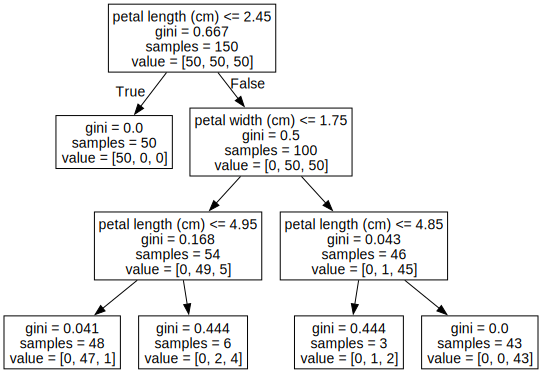

In [25]:
import graphviz
with open('dec_tree_iris.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)